---

# Predicting Financial Distress with K-Nearest Neighbors

In this notebook, we will use a K-Nearest Neighbors (KNN) classifier to predict whether an individual is likely to experience financial distress within the next two years, based on personal financial attributes. KNN is a non-parametric, instance-based learning algorithm that classifies a new observation by majority vote of the k closest training examples in feature space.

Because KNN does not make strong assumptions about the data distribution, it can be effective when the relationship between features and labels is local and nonlinear. However, its performance is sensitive to the choice of k, the scaling of input features, and the size of the dataset, as prediction requires computing distances to all training points.

We will use the Give Me Some Credit dataset, which contains anonymized financial and demographic information for loan applicants. The features include:

- RevolvingUtilizationOfUnsecuredLines: Ratio of revolving credit to total available credit

- DebtRatio: Total monthly debt payments divided by monthly gross income

- MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, etc.

The target variable indicates whether the individual has been delinquent in repaying debts in the past two years.

After preprocessing and scaling the data, we will use a custom implementation of KNN to classify instances and evaluate its performance. We will also explore the impact of varying k on accuracy and discuss the method’s strengths and limitations in this context. We begin with the necessary imports:

---

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from knn import *

---

Next, we situate our data in a dataframe and rename the relevant features for ease of use.

---

In [46]:
df = pd.read_csv("data/cs-training.csv", index_col=0)

# Rename target for clarity
df.rename(columns={'SeriousDlqin2yrs': 'Distress'}, inplace=True)

df

,Distress,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


---

We next process our data and standardize the features while removing empty rows.

---

In [47]:
# Drop rows with missing values
df.dropna(inplace=True)

# Define features and target
X = df.drop(columns='Distress')
y = df['Distress']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


---

Next, separate the training and testing sets.

---

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


---

Next, we train our model. This is a time-consuming training given the size of the dataset, so we will cut down our sets for significantly faster training.

---

In [73]:
X_train = X_train[:100000]
y_train = y_train[:100000]
X_test = X_test[:20000]

model = KNN(k=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


---

Finally, we can make our predictions and visualize our confusion matrix. We will use the classification_report method which gives a detailed look into the model's inferences.

---

Accuracy: 94.50%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       189
           1       0.50      0.09      0.15        11

    accuracy                           0.94       200
   macro avg       0.72      0.54      0.56       200
weighted avg       0.92      0.94      0.93       200



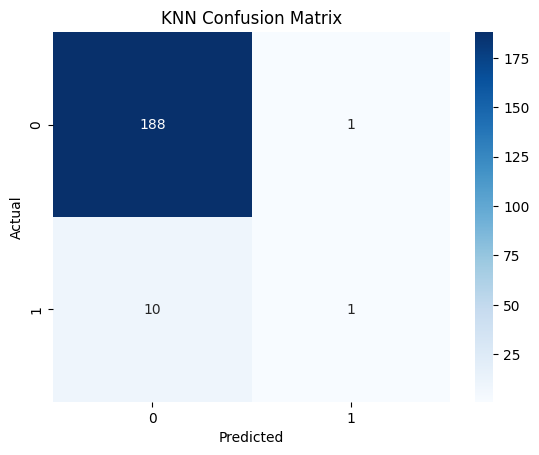

In [74]:
y_pred = model.predict(X_test)
y_test = y_test[:20000]
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()


---

As we can see, the model converged to classifying the majority of entries as type 0, which reflects the skewedness of the overall distribution. Still, it had trouble accurately picking out target 1 data, likely because the distance between it and clusters of target 0 data wasn't significant. As we will find in the logistic regression notebook, other methods are able to perform classification on such datasets faster and more accurately. Regardless, we can see the the K Nearest Neighbors algorithm is a powerful way to make sense of dense and culstered data through classification.

---